<a href="https://colab.research.google.com/github/filmerxyz/JSTP-22_SkinDiseaseClassificationUsingMachineLearning/blob/master/PRACTICE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST**

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

# **Check GPU**

In [ ]:
!nvidia-smi

Wed Jun 17 16:57:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

# **Load Data**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# **Reshape Data**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# **One Hot Encoding**

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# **Convert From Integers To Floats**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train_norm  = x_train/ 255.0
x_test_norm = x_test/ 255.0

# **Build Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Training**

In [ ]:
history = model.fit(x_train_norm,
                    y_train,
                    validation_split=0.2,
                    batch_size=32,
                    epochs=20,
                    verbose=1)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2160 - accuracy: 0.9326 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0458 - val_accuracy: 0.9863
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0525 - val_accuracy: 0.9846
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.0391 - val_accuracy: 0.9887
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0401 - val_accuracy: 0.9889
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.0357 - val_accuracy: 0.9910
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.0417 - val_accuracy:

# **Graph**

### **Accuracy**

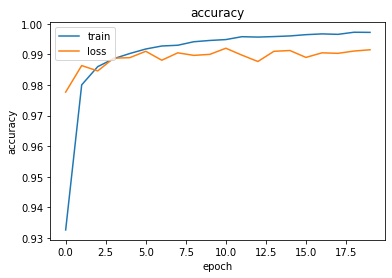

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.title('accuracy')
plt.show()

### **Loss**

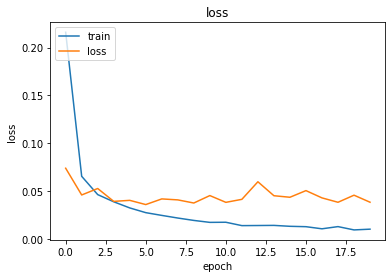

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.title('loss')
plt.show()

# **Test**

In [ ]:
scores = model.evaluate(x_test_norm, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9927


In [ ]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.03456755727529526
Test accuracy: 0.9926999807357788
